In [7]:
# Import and set up
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, accuracy_score

np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns


In [8]:
# Load the dataset
dataset = pd.read_csv('data_train.csv')

X = dataset.drop(['Status', 'Id'], axis=1)
Y = dataset[['Status']]

In [9]:
# create testing and training data for RM variable
from sklearn.model_selection import train_test_split
trainX, subsetX, trainY, subsetY = train_test_split(np.array(X), np.array(Y), test_size=0.4)
validateX, testX, validateY, testY = train_test_split(np.array(subsetX), np.array(subsetY), test_size=0.5)

In [11]:
# Possible values for maximum depth of the tree
max_depths = range(1, 26)  # from 1 to 25
train_performance = list()
valid_performance = list()

for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0, class_weight='balanced')
    
    clf.fit(trainX, trainY.ravel())  # Train the classifier
    
    train_pred = clf.predict(trainX)
    train_f1 = f1_score(trainY, train_pred, average='macro')  # Calculate the train F1-score
    
    val_pred = clf.predict(validateX)
    val_f1 = f1_score(validateY, val_pred, average='macro')  # Calculate the validation F1-score
    
    train_performance.append(train_f1)
    valid_performance.append(val_f1)



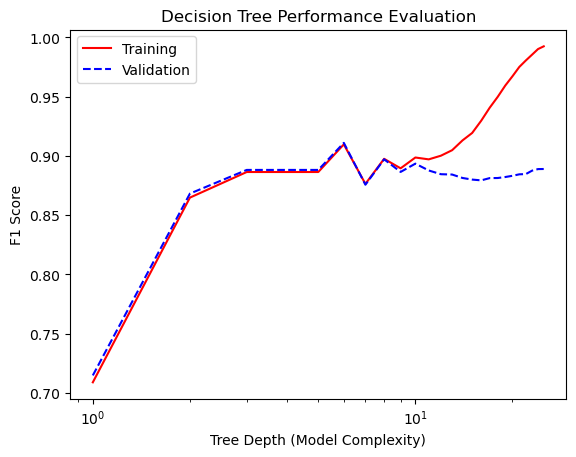

In [12]:
# Plot the f1 scores
# Assuming max_depths from 1 to 25 as used in the tree model
plt.plot(max_depths, train_performance, 'r-')  # Red solid line for training
plt.plot(max_depths, valid_performance, 'b--')  # Blue dashed line for validation

plt.xlabel('Tree Depth (Model Complexity)')
plt.ylabel('F1 Score')
plt.xscale("log")  # Applying logarithmic scale to x-axis
plt.title('Decision Tree Performance Evaluation')
plt.legend(['Training', 'Validation'])
plt.show()



In [13]:
# Optionally, you might want to find and print the best depth
best_index = valid_performance.index(max(valid_performance))
best_depth = max_depths[best_index]
print(f"Best validation performance: F1 score = {valid_performance[best_index]} at depth = {best_depth}")

clf = DecisionTreeClassifier(max_depth=best_depth, random_state=0, class_weight='balanced')
    
clf.fit(trainX, trainY.ravel())  # Train the classifier

train_pred = clf.predict(trainX)
train_f1 = f1_score(trainY, train_pred, average='macro')  # Calculate the train F1-score

val_pred = clf.predict(validateX)
val_f1 = f1_score(validateY, val_pred, average='macro')  # Calculate the validation F1-score

print("Train F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))

Best validation performance: F1 score = 0.9109945309534551 at depth = 6
Train F1-Score score: 0.910
Validation F1-Score score: 0.911


In [16]:
# Classification Report
from sklearn.metrics import classification_report

test_pred = clf.predict(testX)
print("Testing F1-Score score: {:.3f}".format(val_f1))
    
print(classification_report(testY, test_pred,))

Testing F1-Score score: 0.911
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     33528
           1       0.83      0.86      0.85      7061

    accuracy                           0.95     40589
   macro avg       0.90      0.91      0.91     40589
weighted avg       0.95      0.95      0.95     40589



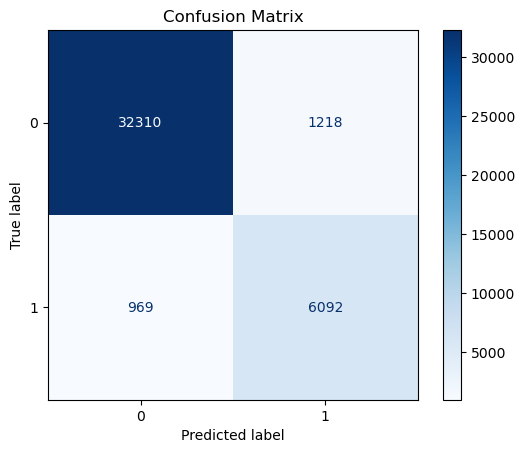

In [15]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(testY, test_pred)
# Create the ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()